# lab12


1. Підготовка середовища
    - встановлення бібліотек і завантаження даних
    

2. Завантаження даних

In [1]:
import pandas as pd

data = pd.read_csv("train.csv")
print(data.head())

print(data.columns)

                                                 sms  label
0  Go until jurong point, crazy.. Available only ...      0
1                    Ok lar... Joking wif u oni...\n      0
2  Free entry in 2 a wkly comp to win FA Cup fina...      1
3  U dun say so early hor... U c already then say...      0
4  Nah I don't think he goes to usf, he lives aro...      0
Index(['sms', 'label'], dtype='object')


3. Передобробка тексту
    - Очистка тексту

In [2]:
import re

data['sms'] = data['sms'].fillna('')
data['sms'] = data['sms'].astype(str)

data['cleaned_text'] = data['sms'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))

data.head()


,sms,label,cleaned_text
0,"Go until jurong point, crazy.. Available only ...",0,go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...\n,0,ok lar joking wif u oni\n
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in 2 a wkly comp to win fa cup fina...
3,U dun say so early hor... U c already then say...,0,u dun say so early hor u c already then say\n
4,"Nah I don't think he goes to usf, he lives aro...",0,nah i dont think he goes to usf he lives aroun...


- Видалення стоп слів

In [3]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
data['cleaned_text'] = data['cleaned_text'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in stop_words)
)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Назар\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


- Лемматизація

In [4]:
import spacy

nlp = spacy.load("en_core_web_sm")
data['lemmatized_text'] = data['cleaned_text'].apply(
    lambda x: ' '.join([token.lemma_ for token in nlp(x)])
)


4. Вектрирзація тексту

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(data['lemmatized_text'])

5. Розбиття даних

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.2, random_state=42)


6. Навчання моделі

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['case_title_encoded'] = label_encoder.fit_transform(data['label'])

X_train, X_test, y_train, y_test = train_test_split(X, data['case_title_encoded'], test_size=0.2, random_state=42)

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

model = MultinomialNB()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9693251533742331


7. Візуалізація результатів

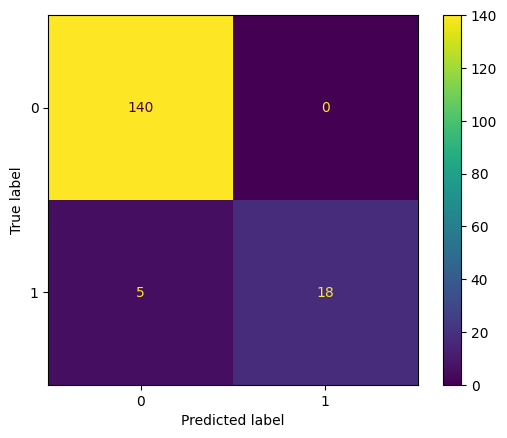

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()